# Sieci neuronowe 1 - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

---
Plan zajęć:
---
1. Analiza struktury bazy oraz etykiet.
2. Wektoryzacja danych.
3. Kodowanie "one-hot", konwersja etykiet.
4. Inne typy daych - wczytanie dodatkowej bazy. Analiza wartości, normalizacja.
---

# Zadanie 1
Do pliku `preprocessing.py` skopiuj kod funkcji pozwalających na zamianę na skalę szarości, normalizację oraz wektoryzację obrazka. Pamiętaj o dołączeniu odpowiednich pakietów! Przetestuj na obrazku z poprzednich zajęć działanie funkcji.

In [1]:
from preprocessing import rgb2gray3, linear_norm, img2vec
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('drzewo.png')

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
gray_img = rgb2gray3(img)
plt.imshow(gray_img, cmap="gray")
plt.subplot(1, 3, 3)
norm_img = linear_norm(img)
plt.imshow(norm_img)

vec_img = img2vec(gray_img)

## Zadanie 2
Zapoznaj się z informacjami o bazie danych `CIFAR-10`.

[Click! CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Ściągnij bazę danych (wesja Python) a następnie ją wczytaj zgodnie z instrukcją na stronie (korzystamy z wersji dla python3)

In [4]:
# Check if `cifar-10-batches-py` directory exists in the current directory.
# If not, download the dataset from the internet.
import os

db_path = "cifar-10-batches-py"
if not os.path.exists(db_path):
    # https://gist.github.com/devhero/8ae2229d9ea1a59003ced4587c9cb236
    import urllib.request
    import tarfile

    print("Downloading CIFAR-10 dataset...")
    thetarfile = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    ftpstream = urllib.request.urlopen(thetarfile)
    # The ftpstream object is a file-like that represents the connection to the ftp server. 
    # Then the tarfile module can access this stream. 
    # Since we do not pass the filename, we have to specify the compression in the mode parameter.
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall()
    print("Download complete.")

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_data = unpickle('cifar-10-batches-py/data_batch_1')
cifar_meta = unpickle('cifar-10-batches-py/batches.meta')

# Zadanie 3
Wyświetl nazwy etykiet danych zapisanych w `label_names`. Wyświetl zbiór wartości etykiet zapisanych w `labels`. 
Następnie stwórz słownik konwersji nazw na numery etykiet, oraz numerów etykiet na nazwy.

In [6]:
import numpy as np
label_names = cifar_meta[b'label_names']
print(label_names)
label_numbers = np.unique(cifar_data[b'labels'])
print(label_numbers)

# Create dictionary with mapping between label_numbers and label_names
label_to_names = {}
names_to_labels = {}
for i, label in enumerate(label_names):
    label_to_names[i] = cifar_meta[b'label_names'][i]
    names_to_labels[label] = i

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
[0 1 2 3 4 5 6 7 8 9]


# Zadanie 4
Wyświetl po jednym rysunku dla każdej klasy w tytule dopisując nazwę klasy. Następnie wyświetl wszystkie obrazki na jednym rysunku (wykorzystaj `subplot`).

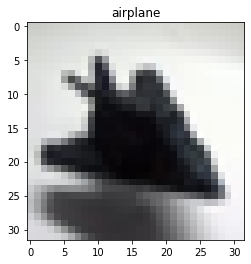

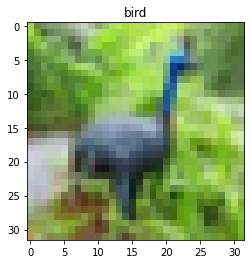

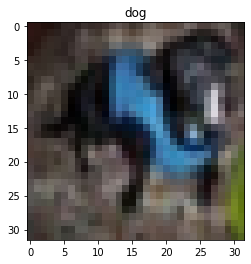

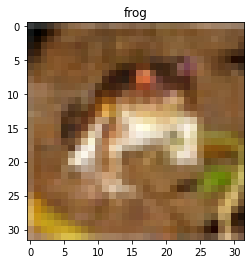

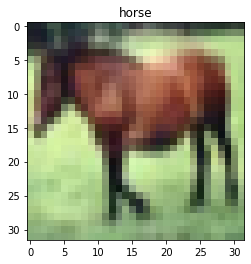

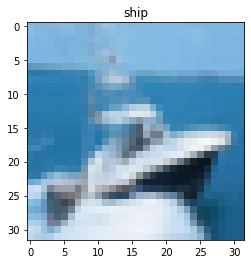

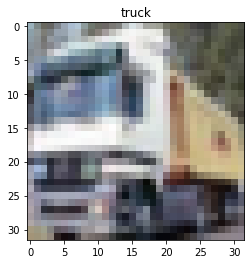

In [8]:
def display_cifar(img, label):
    plt.figure()
    plt.imshow(img)
    plt.title(label)

cifar_data.keys()
labels: list[int] = cifar_data[b'labels']

for i in range(len(label_names)):
    img_idx = labels.index(i)
    img = cifar_data[b'data'][img_idx].reshape(3, 32, 32).transpose(1, 2, 0)
    label = label_to_names[i].decode('utf-8')
    display_cifar(img, label)    

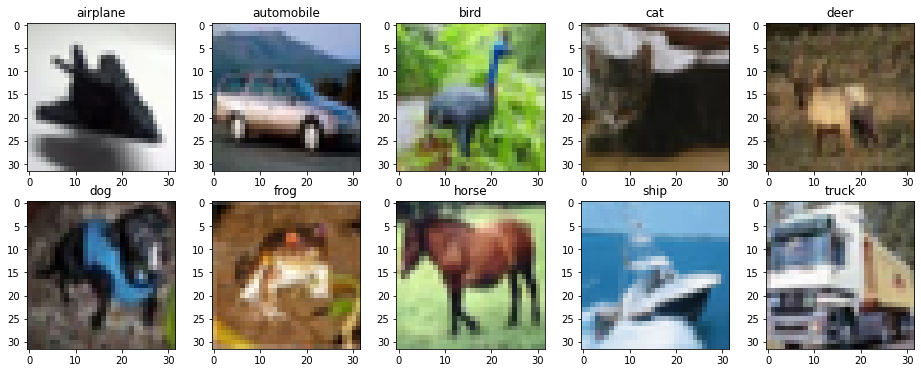

In [11]:
plt.figure(figsize=(16, 6))
img_list = []
for i in range(len(label_names)):
    img_idx = labels.index(i)
    img = cifar_data[b'data'][img_idx].reshape(3, 32, 32).transpose(1, 2, 0)
    img_list.append(img)
    plt.subplot(2, 5, i+1)
    plt.title(label_to_names[i].decode('utf-8'))
    plt.imshow(img)

## Zadanie 5

Dokonaj preprocesingu obrazów zawartych w bazie wykorzystując poprzednio napisane funkcje. Całość zamknij w funkcji `preprocessing_images`.  

In [12]:
def load_images(data):
    data = data.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
    return data

def preprocess_images(img_list):
    vec_img_list = []
    for i, img in enumerate(img_list):

        img_temp = rgb2gray3(img)
        img_temp = linear_norm(img_temp)
        img_temp = img2vec(img_temp)
        vec_img_list.append(img_temp)
    return vec_img_list

In [13]:
img_list = load_images(cifar_data[b'data'])
vec_img_list = preprocess_images(img_list)

## Zadanie 6

Napisz metodę, która zamieni standardowe wartości etykiet na tzw. "one-hot".
Przykład dla 3 klas:

```Etykieta    kodowanie```

        0      1 0 0
        
        1      0 1 0
        
        2      0 0 1 

In [14]:
# convert label number to one-hot vector
def label2onehot(label, max_label):
    onehot = np.zeros(max_label+1)
    onehot[label] = 1
    return onehot

# convert one-hot vector to label number
def onehot2label(onehot):
    label = np.argmax(onehot)
    return label

Test

In [15]:
label_value = 3
max_label = 5
onehot = label2onehot(label_value,max_label)
print(onehot)
label = onehot2label(onehot)
print(label)

[0. 0. 0. 1. 0. 0.]
3


---

## Zadanie 7

Z `sklearn.datasets` wykorzystaj `load_breast_cancer()` do załadowania bazy danych. Zapoznaj się z danymi i informacjami o nich.

[CLICK!](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

In [17]:
import sklearn.datasets as datasets
breast_cancer_data = datasets.load_breast_cancer()
# Analyze data
print(breast_cancer_data['DESCR'])
print(breast_cancer_data['feature_names'])
print(breast_cancer_data['target_names'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Zadanie 8

W jaki sposób należy wykonać normalizację takich danych? Napisz metodę która na to pozwoli.


In [19]:
# Normalize data
def normalize_data(data):
    data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    return data

data = breast_cancer_data['data']
data_norm = normalize_data(breast_cancer_data['data'])

# Verify with the built-in function if the data is normalized correctly
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_norm_scaler = scaler.transform(breast_cancer_data['data'])

print(np.all(data_norm_scaler - data_norm < 0.01))


True


## Zadanie 9
Przygotuj etykiety danych w kodowaniu one-hot. 

In [20]:
# Convert labels to one-hot vectors
labels = breast_cancer_data['target']
labels_onehot = []
for label in labels:
    labels_onehot.append(label2onehot(label, 1))

labels_onehot = np.array(labels_onehot)

## Zadanie 10

Zapoznaj się z działaniem funkcji aktywacji `ReLU`. Spróbuj napisać własną wersję. Przetestuj na wygnerowanym wektorze danych za pomocą np. `numpy.random.rand()`

[0 0 1 2 3]
[0 0 1 1 1]


Text(0.5, 1.0, 'ReLU activation function on random data')

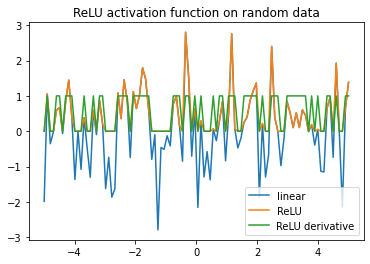

In [22]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Test ReLU
x = np.array([-1, 0, 1, 2, 3])
print(relu(x))
print(relu_derivative(x))

# Plot ReLU
x = np.arange(-5, 5, 0.1)
plt.plot(x, x)
plt.plot(x, relu(x))
plt.plot(x, relu_derivative(x))
plt.legend(['linear', 'ReLU', 'ReLU derivative'])
plt.title('ReLU activation function on linear data')

# Plot ReLU on random data
plt.figure()
v = np.linspace(-5, 5, 100)
x = np.random.randn(100)
plt.plot(v, x)
plt.plot(v, relu(x))
plt.plot(v, relu_derivative(x))
plt.legend(['linear', 'ReLU', 'ReLU derivative'])
plt.title('ReLU activation function on random data')